In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
highPerturbation = pd.read_csv('./highp_finalresults.csv')#, index_col=0)
lowPerturbation = pd.read_csv('./lowp_finalresults.csv')#, index_col=0)

## Primero se realiza un análisis individual de cada sistema para extraer la información

In [3]:
columns=['ident','emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas',\
        'num_planets','mass_planets','mass_efficiency']

#High Perturbation System Analysis
Num_systh = highPerturbation['ident'].values[-1]+1
highp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systh):
    Current_syst = highPerturbation[highPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:12]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    highp_vars.loc[i]=row_vals
    
    
#Low Perturbation System Analysis
Num_systl = lowPerturbation['ident'].values[-1]+1
lowp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systl):
    Current_syst = lowPerturbation[lowPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:12]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    lowp_vars.loc[i]=row_vals

In [4]:
lowp_vars.head()

,ident,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,num_planets,mass_planets,mass_efficiency
0,0,4.368174e+32,59.88237,1.110726,51.28767,0.13,1,0.1,1,0.1,0.07707005,9268935,12,6.705383,51.57987
1,1,2.095099e+32,40.0402,3.201758,16.76598,0.019,1,0.1,1,0.1,-0.09279143,3525594,8,2.72532,143.4379
2,2,5.35489e+32,40.64716,1.965345,67.64477,0.079,1,0.1,1,0.1,0.5147697,9390406,12,10.74999,136.0759
3,3,3.614768e+32,29.53934,9.568532,16.2131,0.01,1,0.1,1,0.1,0.3281458,1644711,23,6.397114,639.7114
4,4,2.885875e+32,61.19504,2.230675,15.86662,0.042,1,0.1,1,0.1,-0.2200311,9468353,10,2.95313,70.31262


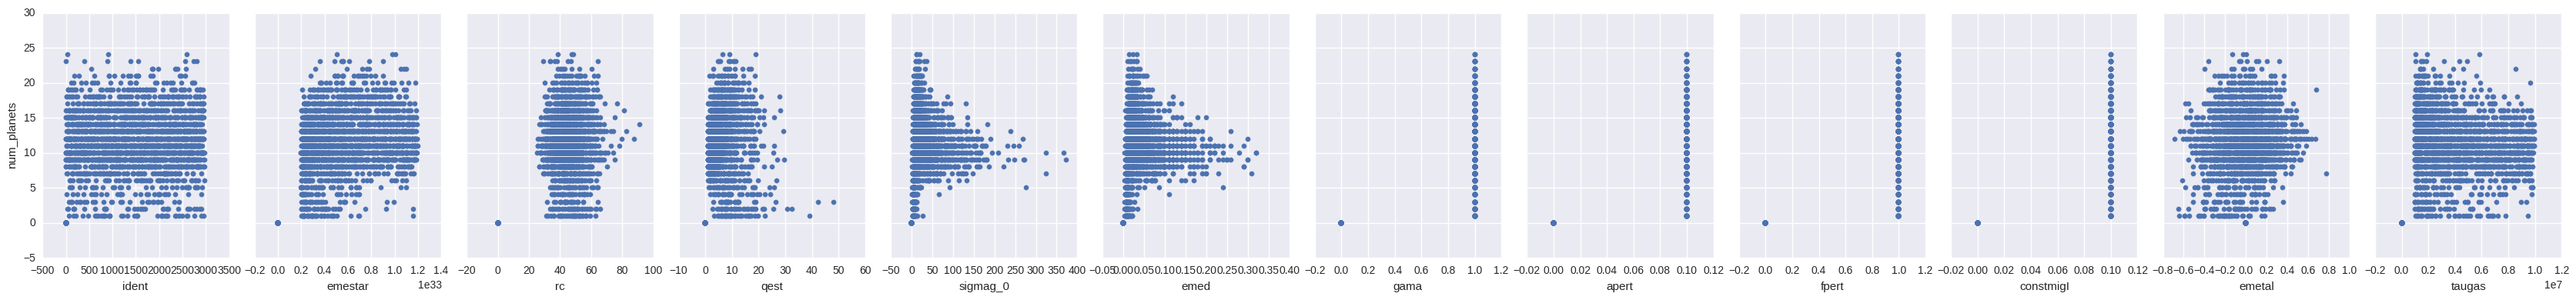

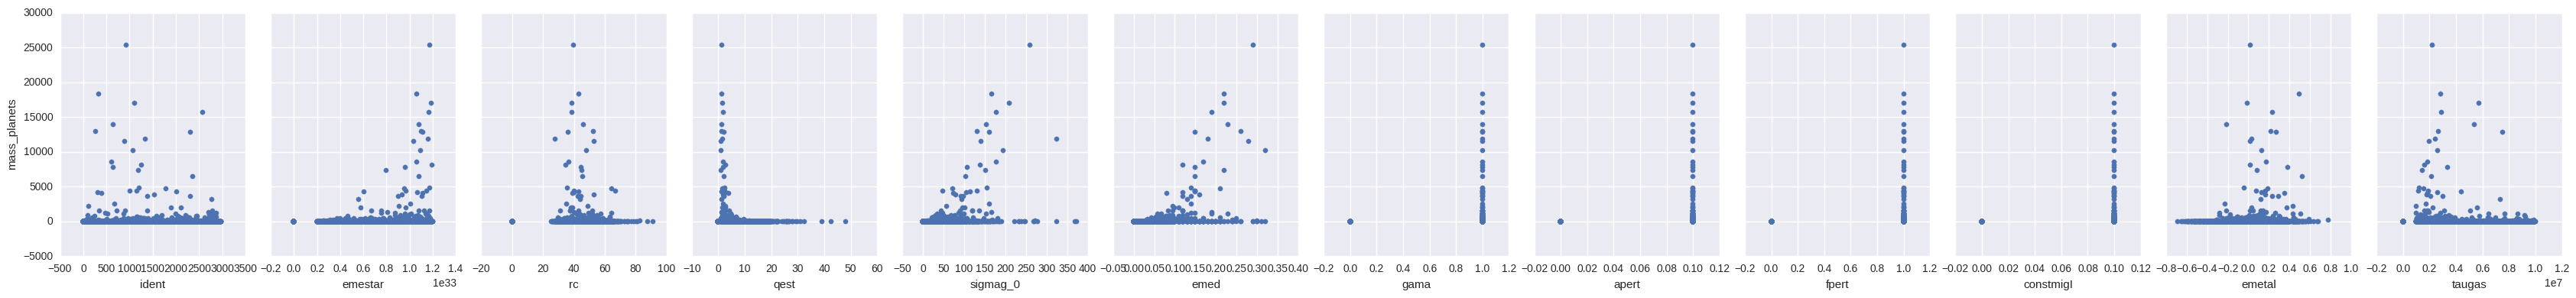

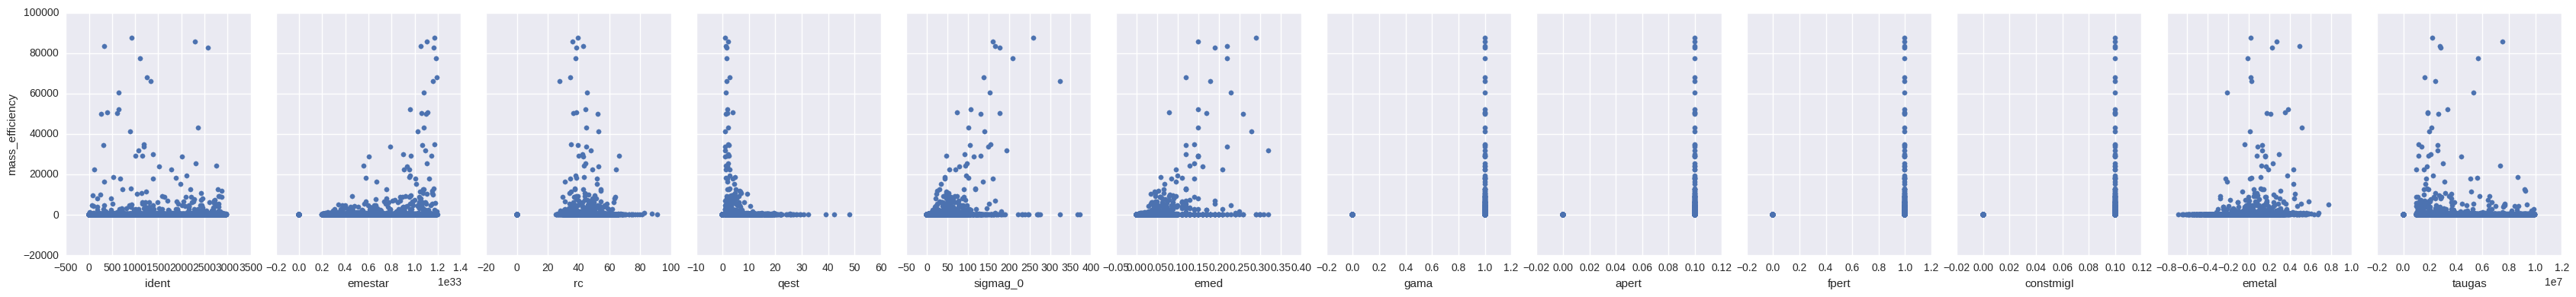

In [5]:
data = ['ident','emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']
target = ['num_planets','mass_planets','mass_efficiency']
lowp=pd.DataFrame(lowp_vars)

X=lowp[data]
Y=lowp[target]

for i in target:
        sns.pairplot(lowp, x_vars=data, y_vars=i, size=4, aspect=0.7)

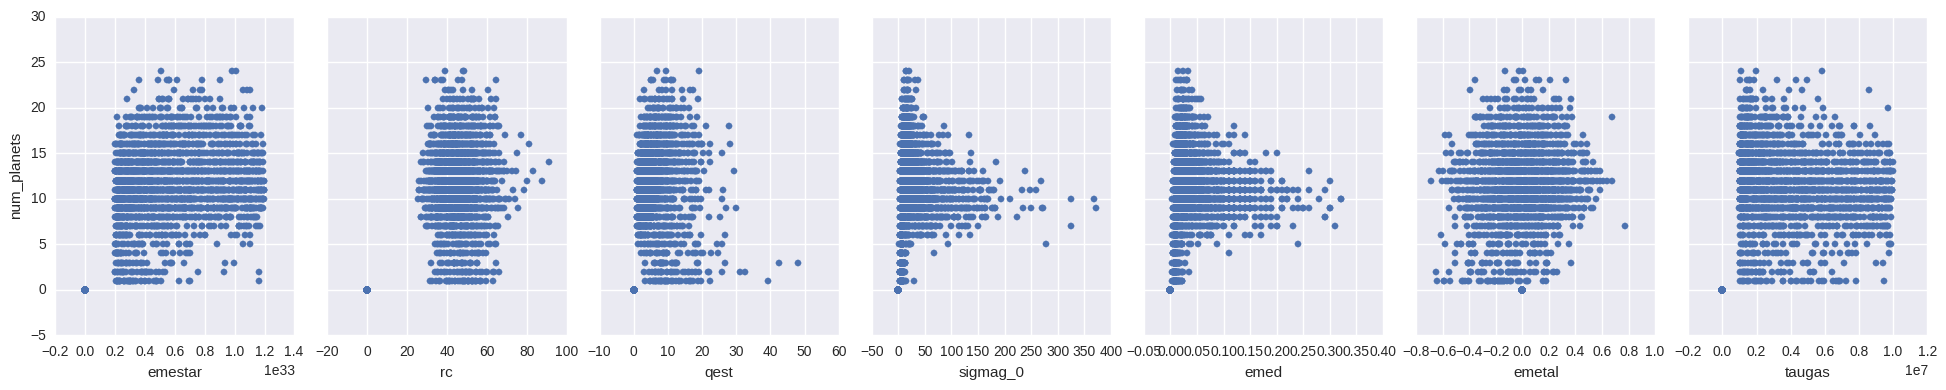

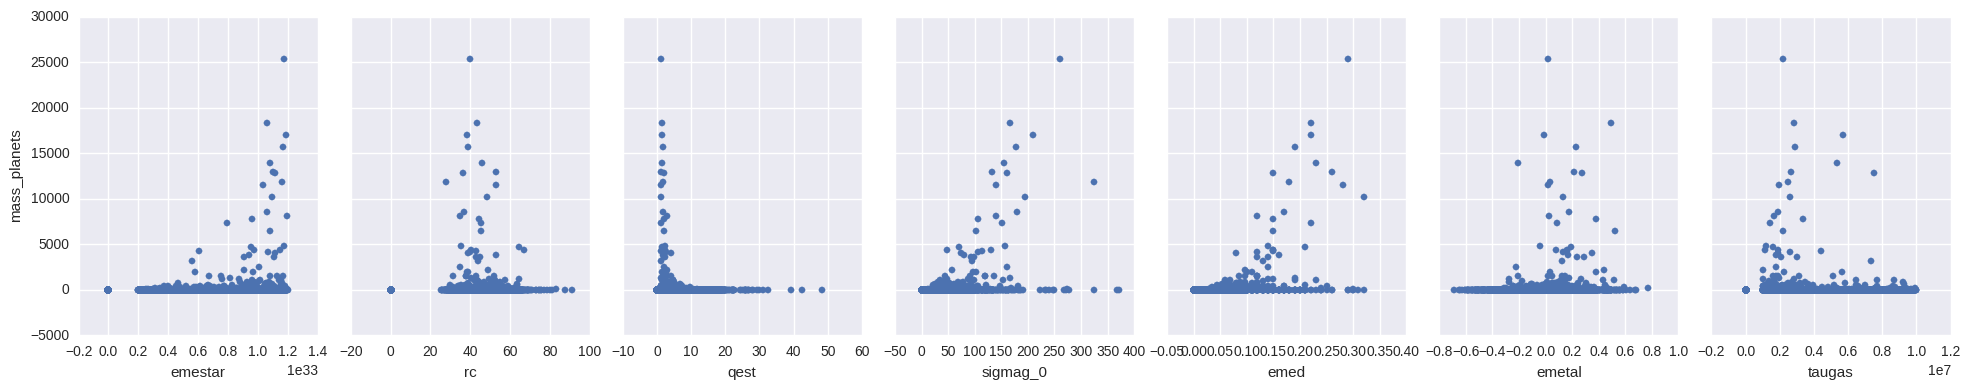

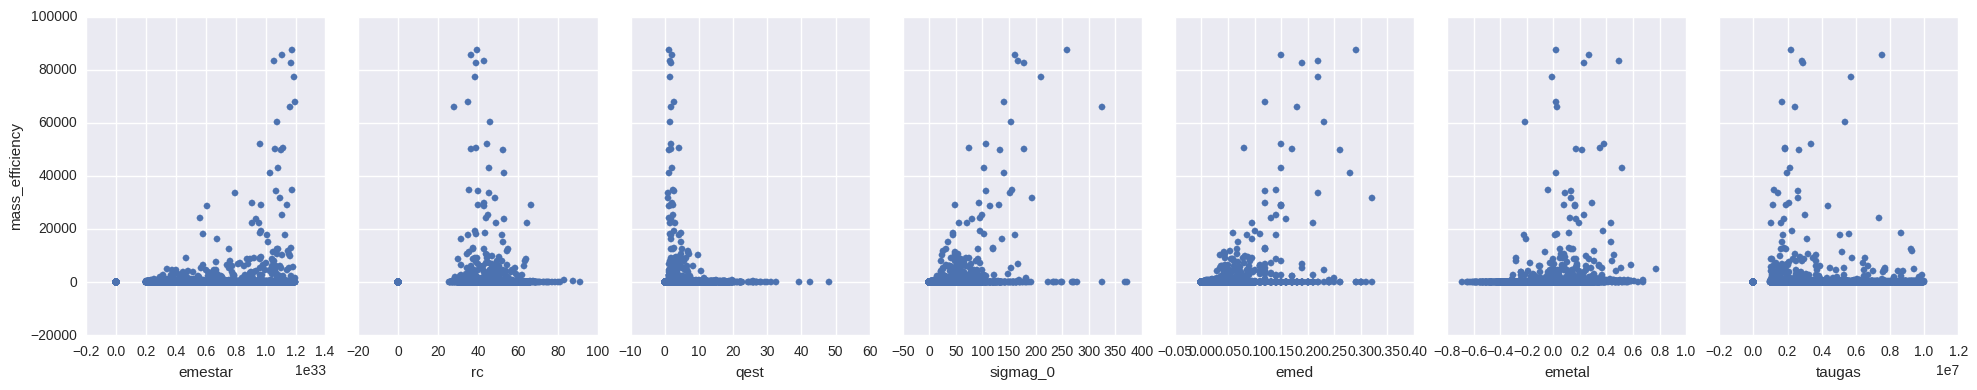

In [6]:
not_relevance=['ident','gama','apert','fpert','constmigI']

for i in not_relevance:
    data.remove(i)

X=lowp[data]
Y=lowp[target]

for i in target:
        sns.pairplot(lowp, x_vars=data, y_vars=i, size=4, aspect=0.7)

In [7]:
from sklearn.ensemble import RandomForestClassifier

scaler = preprocessing.StandardScaler().fit(X)
Ym=Y.mean()
Y=Y-Ym

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)   

for var in data:
    for val in target:
        rf = RandomForestClassifier(n_estimators=100)
        X=np.array(X[var])
        Y=np.array(Y[val])
        rf.fit(X[:200], Y[:200])

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Unknown label type: 'unknown'